In [3]:
import numpy as np
import scipy as sp
import scipy.linalg as solve
#PROBLEM 1.
#A. construct matrices

A = np.zeros(shape=(100,100))
B = np.zeros(100)
for i in range(0,100):
    if(i == 0):
        A[0][0] = 2
        A[0][1] = -1
        B[0] = 0
    elif(i == 99):
        A[99][99] = 2
        A[99][98] = -1
        B[99] = 99
    else:
        A[i][i - 1] = -1
        A[i][i] = 2
        A[i][i + 1] = -1
        B[i] = i
        
print A
print B

[[ 2. -1.  0. ...,  0.  0.  0.]
 [-1.  2. -1. ...,  0.  0.  0.]
 [ 0. -1.  2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  2. -1.  0.]
 [ 0.  0.  0. ..., -1.  2. -1.]
 [ 0.  0.  0. ...,  0. -1.  2.]]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.]


In [121]:
#B. CONDITION NUMBER
cond = np.linalg.cond(A)
print cond

4133.6429268


In [2]:
#C. explicit solution by inverting A and multiplying b
Ainv = np.linalg.inv(A)
solution = np.dot(Ainv,B)
print solution

[  1650.   3300.   4949.   6596.   8240.   9880.  11515.  13144.  14766.
  16380.  17985.  19580.  21164.  22736.  24295.  25840.  27370.  28884.
  30381.  31860.  33320.  34760.  36179.  37576.  38950.  40300.  41625.
  42924.  44196.  45440.  46655.  47840.  48994.  50116.  51205.  52260.
  53280.  54264.  55211.  56120.  56990.  57820.  58609.  59356.  60060.
  60720.  61335.  61904.  62426.  62900.  63325.  63700.  64024.  64296.
  64515.  64680.  64790.  64844.  64841.  64780.  64660.  64480.  64239.
  63936.  63570.  63140.  62645.  62084.  61456.  60760.  59995.  59160.
  58254.  57276.  56225.  55100.  53900.  52624.  51271.  49840.  48330.
  46740.  45069.  43316.  41480.  39560.  37555.  35464.  33286.  31020.
  28665.  26220.  23684.  21056.  18335.  15520.  12610.   9604.   6501.
   3300.]


In [3]:
#D. solution using scipy.linalg.solve
solution2 = solve.solve(A,B)
print solution2

[  1650.   3300.   4949.   6596.   8240.   9880.  11515.  13144.  14766.
  16380.  17985.  19580.  21164.  22736.  24295.  25840.  27370.  28884.
  30381.  31860.  33320.  34760.  36179.  37576.  38950.  40300.  41625.
  42924.  44196.  45440.  46655.  47840.  48994.  50116.  51205.  52260.
  53280.  54264.  55211.  56120.  56990.  57820.  58609.  59356.  60060.
  60720.  61335.  61904.  62426.  62900.  63325.  63700.  64024.  64296.
  64515.  64680.  64790.  64844.  64841.  64780.  64660.  64480.  64239.
  63936.  63570.  63140.  62645.  62084.  61456.  60760.  59995.  59160.
  58254.  57276.  56225.  55100.  53900.  52624.  51271.  49840.  48330.
  46740.  45069.  43316.  41480.  39560.  37555.  35464.  33286.  31020.
  28665.  26220.  23684.  21056.  18335.  15520.  12610.   9604.   6501.
   3300.]


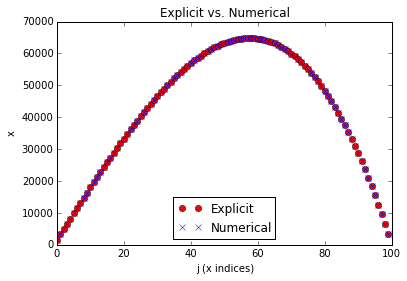

In [4]:
#PLOT
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(solution, 'ro', solution2, 'bx')
plt.title("Explicit vs. Numerical")
plt.legend(("Explicit", "Numerical"), loc="lower center")
plt.ylabel('x')
plt.xlabel('j (x indices)')
plt.show()


PROBLEM 4 - solving the equation using an absolute tolerance of $10^{-6}$ and w = 1.1 for SOR

In [12]:
def jacobi(A, b, x, tol = 10**(-6), sc = 10**(-6)):
    #FORM: A x = b ----> A: matrix, x: vector, b: vector
    #A, b, x - matrices used to generate soln, x is first guess of soln
    #tol = absolute tolerance for convergence (default is set to 10^-6)
    #sc = stopping criterion (relative error)
    #to use only tol or sc option for convergence condition, set the other option to -1.
    length = len(x)
    D = np.diag(A)
    R = A - np.diagflat(D)
    D = np.diagflat(D)
    i = 1
    temp = x
    x = np.dot(np.linalg.inv(D),(b - np.dot(R,x)))
    err = abs(temp - x)
    maxerr = max(err)
    maxrelerr = max(err / x)
    while (maxerr > tol and maxrelerr > sc):
        i += 1
        temp = x
        x = np.dot(np.linalg.inv(D),(b - np.dot(R,x)))
        err = abs(temp - x)
        maxerr = max(err)
        maxrelerr = max(err / x)
    return (x,i) #Return solution and number of iterations

In [13]:
def gauss(A, b, x,  tol = 10**(-6), sc = 10**(-6)):
    #FORM: A x = b ----> A: matrix, x: vector, b: vector
    #A, b, x - matrices used to generate soln, x is first guess of soln
    #tol = absolute tolerance for convergence (default is set to 10^-6)
    #sc = stopping criterion (relative error)
    #to use only tol or sc option for convergence condition, set the other option to -1.
    LD = np.tril(A)
    U = A - LD
    i = 1
    temp = x
    x = np.dot(np.linalg.inv(LD), b - np.dot(U, x))
    err = abs(temp - x)
    maxerr = max(err) 
    maxrelerr = max(err / x)
    while (maxerr > tol and maxrelerr > sc):
        i += 1
        temp = x
        x = np.dot(np.linalg.inv(LD), b - np.dot(U, x))
        err = abs(temp - x)
        maxerr = max(err)
        maxrelerr = max(err / x)
    return (x,i) #Return solution and number of iterations

In [14]:
def SOR(A, b, x, w, tol = 10**(-6), sc = 10**(-6)):
    #FORM: A x = b ----> A: matrix, x: vector, b: vector
    #A, b, x - matrices used to generate soln, x is first guess of soln
    #tol = absolute tolerance for convergence (default is set to 10^-6)
    #sc = stopping criterion (relative error)
    #w = variable for SOR
    #to use only tol or sc option for convergence condition, set the other option to -1.
    vector = np.zeros(1)
    L = np.tril(A, -1)
    D = np.diagflat(np.diag(A))
    U = A - L - D
    i = 1
    temp = x
    x = np.dot(np.linalg.inv(w*L + D), w*b - np.dot( w * U - (1 - w)*D, x))
    err = abs(temp - x)
    maxerr = max(err)  
    maxrelerr = max(err / x)
    while (maxerr > tol and maxrelerr > sc):
        i += 1
        temp = x
        x = np.dot(np.linalg.inv(w*L + D), w*b - np.dot( w * U - (1 - w)*D, x))
        err = abs(temp - x)
        maxerr = max(err)
        maxrelerr = max(err / x)
    return (x,i)

In [15]:
A1 = np.zeros(shape=(5,5))
B1 = np.zeros(5)
for i in range(0,5):
    if(i == 0):
        A1[0][0] = 4
        A1[0][1] = -1
        B1[0] = 100
    elif(i == 4):
        A1[4][4] = 4
        A1[4][3] = -1
        B1[4] = 100
    else:
        A1[i][i - 1] = -1
        A1[i][i] = 4
        A1[i][i + 1] = -1
        B1[i] = 100
print str(A1) + "* x = " + str(B1) + "\n" 
print "Explicit Solution: " + str(np.dot(np.linalg.inv(A1), B1)) + "\n"

[[ 4. -1.  0.  0.  0.]
 [-1.  4. -1.  0.  0.]
 [ 0. -1.  4. -1.  0.]
 [ 0.  0. -1.  4. -1.]
 [ 0.  0.  0. -1.  4.]]* x = [ 100.  100.  100.  100.  100.]

Explicit Solution: [ 36.53846154  46.15384615  48.07692308  46.15384615  36.53846154]



In [16]:
#A.
x = np.zeros(5)
jsol, jiter = jacobi(A1, B1, x, sc = -1) 

In [9]:
#B.
x = np.zeros(5)
gsol, giter = gauss(A1, B1, x, sc = -1)

In [10]:
#C. 
x = np.zeros(5)
SORsol, SORiter = SOR(A1, B1, x, 1.1, sc = -1)

In [11]:
print "Jacobi: " + "\n"
print "Number of Iterations: " + str(jiter)
print "Solution: " + str(jsol) + "\n"
print "Gauss-Seidel: " + "\n"
print "Number of Iterations: " + str(giter)
print "Solution: " + str(gsol) + "\n"
print "SOR: " + "\n"
print "Number of Iterations: " + str(SORiter)
print "Solution: " + str(SORsol) + "\n"

Jacobi: 

Number of Iterations: 22
Solution: [ 36.53846125  46.15384569  48.07692251  46.15384569  36.53846125]

Gauss-Seidel: 

Number of Iterations: 13
Solution: [ 36.53846142  46.15384606  48.07692303  46.15384614  36.53846153]

SOR: 

Number of Iterations: 10
Solution: [ 36.53846152  46.15384616  48.07692305  46.15384615  36.53846154]



In [18]:
# PROBLEM 5A - solving the equation using a stopping criterion of 10^-6 and 10^-8, w = 1.1 for SOR
# SC = 10^-6
x = np.zeros(5)
jsol, jiter = jacobi(A1, B1, x, tol = -1) 
gsol, giter = gauss(A1, B1, x, tol = -1)
SORsol, SORiter = SOR(A1, B1, x, 1.1, tol = -1)

print "Using Stopping Criterion of 10^-6"
print "Jacobi: " + "\n"
print "Number of Iterations: " + str(jiter)
print "Solution: " + str(jsol) + "\n"
print "Gauss-Seidel: " + "\n"
print "Number of Iterations: " + str(giter)
print "Solution: " + str(gsol) + "\n"
print "SOR: " + "\n"
print "Number of Iterations: " + str(SORiter)
print "Solution: " + str(SORsol) + "\n"

Using Stopping Criterion of 10^-6
Jacobi: 

Number of Iterations: 18
Solution: [ 36.53845346  46.15383293  48.07690692  46.15383293  36.53845346]

Gauss-Seidel: 

Number of Iterations: 11
Solution: [ 36.53845816  46.15384362  48.07692181  46.15384568  36.53846142]

SOR: 

Number of Iterations: 8
Solution: [ 36.53846919  46.1538498   48.07692421  46.15384677  36.53846134]



In [19]:
#SC = 10^-8
jsol, jiter = jacobi(A1, B1, x, tol = -1, sc = 10**(-8)) 
gsol, giter = gauss(A1, B1, x, tol = -1, sc = 10**(-8))
SORsol, SORiter = SOR(A1, B1, x, 1.1, tol = -1, sc = 10**(-8))

print "Using Stopping Criterion of 10^-8"
print "Jacobi: " + "\n"
print "Number of Iterations: " + str(jiter)
print "Solution: " + str(jsol) + "\n"
print "Gauss-Seidel: " + "\n"
print "Number of Iterations: " + str(giter)
print "Solution: " + str(gsol) + "\n"
print "SOR: " + "\n"
print "Number of Iterations: " + str(SORiter)
print "Solution: " + str(SORsol) + "\n"

Using Stopping Criterion of 10^-8
Jacobi: 

Number of Iterations: 23
Solution: [ 36.53846142  46.15384594  48.07692284  46.15384594  36.53846142]

Gauss-Seidel: 

Number of Iterations: 14
Solution: [ 36.53846152  46.15384614  48.07692307  46.15384615  36.53846154]

SOR: 

Number of Iterations: 10
Solution: [ 36.53846152  46.15384616  48.07692305  46.15384615  36.53846154]



Optimal value of w = 1.06


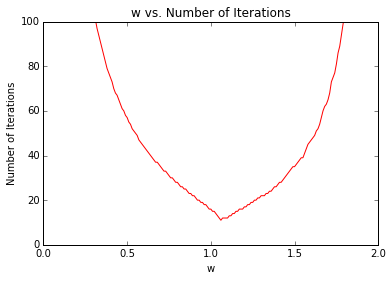

In [20]:
# PROBLEM 5B - finding the optimal w for SOR method -- Plot w vs. number of iteration and find the minimum of the plot. 
# The minimum of the plot means the w value for that point makes the convergence fastest
#I used a low tolerance value(10^-8), so that I can see greater range of distribution 
x = np.zeros(5)
w = np.arange(0.05, 1.95, 0.01)
y = np.zeros(len(w))
for p in range(5, len(w) + 5):
    SORsol, SORiter = SOR(A1, B1, x, p/100.0, tol = 10**(-8), sc = -1)
    y[p - 5] = SORiter
print "Optimal value of w = "  + str(w[np.argmin(y)])
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(w, y, 'r')
plt.xlabel("w")
plt.ylabel("Number of Iterations")
plt.axis([0, 2, 0, 100])
plt.title("w vs. Number of Iterations")